In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
with open('content.json') as content:
    data = json.load(content)

In [3]:
# getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [4]:
# converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                    "tags":tags})

In [5]:
#print the data
data

,inputs,tags
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
...,...,...
453,Go right,right
454,Right,right
455,Take a right,right
456,Rightward,right


In [6]:
# Preprocessing the data
# convertin words to lowercase and removing the punctuation
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hi,greeting
1,how are you,greeting
2,is anyone there,greeting
3,hello,greeting
4,good day,greeting
...,...,...
453,go right,right
454,right,right
455,take a right,right
456,rightward,right


In [7]:
# tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(
    # num_words=None,
    num_words=200000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token="<OOV>", #OOV means OOV
    analyzer=None
)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)
print(x_train)

# encode the outputs
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(data['tags'])
print(y_train)

[[  0   0   0 ...   0   0 322]
 [  0   0   0 ...   8  12  42]
 [  0   0   0 ...   6 323 236]
 ...
 [  0   0   0 ... 321  33 114]
 [  0   0   0 ...   0   0 571]
 [  0   0   0 ...   0 114 177]]
[ 59  59  59  59  59  59  59  59  59  59  57  57  57  57  57  57  57  57
  57  57  57  57  29  29  29  29  29  29  29  29  29  29  29  29  29  29
  29  29  74  74  74  74  74  74  74  74  74  74  74  74  74   7   7   7
   7   7   7   1   1   1   1   1   1  58  58  58  58  70  70  70  70  61
  61  61  61  97  97  97  97  18  18  18  18   9   9   9   9  54  54  54
  54   5   5   5   5  72  72  72  72  20  20  20  20 101 101 101 101  79
  79  79  79  49  49  49  49   6   6   6   6  23  23  23  23  10  10  10
  10  21  21  21  21   2   2   2   2  22  22  22  22   0   0   0   0  44
  44  44  44  15  15  15  15  39  39  39  39  40  40  40  40  69  69  69
  69  12  12  12  12  43  43  43  43  42  42  42  42  41  41  41  41  77
  77  77  77  96  96  96  96  13  13  13  13  19  19  19  19  38  38  38
  38 

In [8]:
input_shape = x_train.shape[1]
print(input_shape)

22


In [9]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words", vocabulary)
output_length = labelEncoder.classes_.shape[0]
print("output length:", output_length)


number of unique words 571
output length: 103


In [10]:
# creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 embedding (Embedding)       (None, 22, 10)            5720      
                                                                 
 lstm (LSTM)                 (None, 22, 10)            840       
                                                                 
 flatten (Flatten)           (None, 220)               0         
                                                                 
 dense (Dense)               (None, 103)               22763     
                                                                 
Total params: 29323 (114.54 KB)
Trainable params: 29323 (114.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
epochs = 200

# Train the model
history = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/200
15/15 [==============================] - 2s 12ms/step - loss: 4.6343 - accuracy: 0.0284
Epoch 2/200
15/15 [==============================] - 0s 11ms/step - loss: 4.6237 - accuracy: 0.0284
Epoch 3/200
15/15 [==============================] - 0s 10ms/step - loss: 4.6083 - accuracy: 0.0284
Epoch 4/200
15/15 [==============================] - 0s 10ms/step - loss: 4.5696 - accuracy: 0.0240
Epoch 5/200
15/15 [==============================] - 0s 10ms/step - loss: 4.5166 - accuracy: 0.0328
Epoch 6/200
15/15 [==============================] - 0s 10ms/step - loss: 4.4529 - accuracy: 0.0415
Epoch 7/200
15/15 [==============================] - 0s 10ms/step - loss: 4.3766 - accuracy: 0.0437
Epoch 8/200
15/15 [==============================] - 0s 9ms/step - loss: 4.2995 - accuracy: 0.0459
Epoch 9/200
15/15 [==============================] - 0s 9ms/step - loss: 4.2091 - accuracy: 0.0415
Epoch 10/200
15/15 [==============================] - 0s 9ms/step - loss: 4.1282 - accuracy: 0.0502
Ep

15/15 [==============================] - 0s 8ms/step - loss: 1.0661 - accuracy: 0.8013
Epoch 83/200
15/15 [==============================] - 0s 10ms/step - loss: 1.0528 - accuracy: 0.8166
Epoch 84/200
15/15 [==============================] - 0s 10ms/step - loss: 1.0301 - accuracy: 0.8210
Epoch 85/200
15/15 [==============================] - 0s 9ms/step - loss: 1.0184 - accuracy: 0.8057
Epoch 86/200
15/15 [==============================] - 0s 10ms/step - loss: 0.9995 - accuracy: 0.8493
Epoch 87/200
15/15 [==============================] - 0s 9ms/step - loss: 0.9782 - accuracy: 0.8253
Epoch 88/200
15/15 [==============================] - 0s 10ms/step - loss: 0.9638 - accuracy: 0.8319
Epoch 89/200
15/15 [==============================] - 0s 10ms/step - loss: 0.9476 - accuracy: 0.8472
Epoch 90/200
15/15 [==============================] - 0s 9ms/step - loss: 0.9345 - accuracy: 0.8275
Epoch 91/200
15/15 [==============================] - 0s 10ms/step - loss: 0.9159 - accuracy: 0.8319
Epoch 9

15/15 [==============================] - 0s 9ms/step - loss: 0.2868 - accuracy: 0.9825
Epoch 164/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2830 - accuracy: 0.9847
Epoch 165/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2793 - accuracy: 0.9869
Epoch 166/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2731 - accuracy: 0.9891
Epoch 167/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2699 - accuracy: 0.9869
Epoch 168/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2656 - accuracy: 0.9825
Epoch 169/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2646 - accuracy: 0.9825
Epoch 170/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2611 - accuracy: 0.9803
Epoch 171/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2536 - accuracy: 0.9913
Epoch 172/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2497 - accuracy: 0.9869


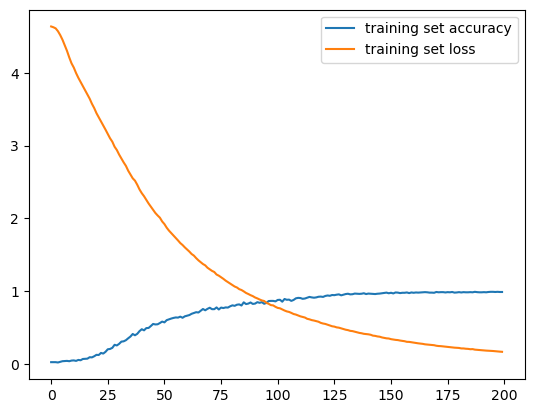

In [12]:
plt.plot(history.history['accuracy'],label='training set accuracy')
plt.plot(history.history['loss'],label='training set loss')
plt.legend()

In [13]:
# code to save mode in pb format and load it for testing purpose
#from keras.models import load_model
from tensorflow import keras
import random
import pandas as pd

# saving model in h5 file
model.save("sensing_nlp.h5")

# new_model = load_model("sensing_nlp.h5")
new_model = keras.models.load_model("sensing_nlp.h5")
# new_model.evaluate()
# new_model.summary()
print(input_shape)


words_to_check = ["end", "quit", "terminate","bye"]
word_series = pd.Series(words_to_check)


while True:
    texts_p=[]
    prediction_input_string=input("You : ")

    # removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input_string if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    # tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    output= new_model.predict(prediction_input)
    output = output.argmax()

    response_tag = labelEncoder.inverse_transform([output])[0]
    print("ROBO ASSISTANT X::: ",random.choice(responses[response_tag]))

    # Initialize a flag to track if any word is found
    found = False

    if word_series.str.contains(prediction_input_string).any():
        print("At least one word is in the string.")
        break

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22
You : hi
1/1 [==============================] - 0s 378ms/step
ROBO ASSISTANT X:::  Hi there, how can I help?
You : quit
1/1 [==============================] - 0s 19ms/step
ROBO ASSISTANT X:::  Good to see you again!
At least one word is in the string.


In [14]:
#exporting the saved model
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [15]:
# Convert the model with the help of Tflite converter.
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.allow_custom_ops= True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS
]

tflite_model_data = converter.convert()

tflite_model_file = pathlib.Path('sensor_nlp_model.tflite')
tflite_model_file.write_bytes(tflite_model_data)

127068

In [16]:
#code to download the model
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

In [17]:
#load tflite model and predict it with the help of it
# Load the TFLite model
from tensorflow.lite.python import interpreter as interpreter_wrapper

with open("sensor_nlp_model.tflite", 'rb') as file:
    model = file.read()
interpreter = interpreter_wrapper.InterpreterWithCustomOps(
      model_content=model,
)

interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

new_text = "sensing"

# Preprocess the input text using tokenizer.texts_to_sequences
new_text_sequences = tokenizer.texts_to_sequences([new_text])[0]
# Pad or truncate the sequences to match the expected input shape [1, 5]
max_sequence_length = 22  # Set this to the expected sequence length of the model
new_text_sequences = new_text_sequences[:max_sequence_length]

# Pad the sequences if they are shorter than the expected length
if len(new_text_sequences) < max_sequence_length:
    new_text_sequences += [0] * (max_sequence_length - len(new_text_sequences))

new_text_tensor = tf.convert_to_tensor([new_text_sequences], dtype=tf.float32)

interpreter.set_tensor(interpreter.get_input_details()[0]['index'],
                         new_text_tensor)
interpreter.invoke()
output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
# print(output)

output_max = output.argmax()
# print(output_max)

response_tag = labelEncoder.inverse_transform([output_max])[0]
print(new_text)
print("ROBO ASSISTANT X::: ",random.choice(responses[response_tag]))

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 22]), 'shape_signature': array([-1, 22]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 32, 'shape': array([  1, 103]), 'shape_signature': array([ -1, 103]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
sensing
ROBO ASSISTANT X:::  Vendor support is vital for ongoing security. Manufacturers should provide regular updates and security patches. Users can assess vendor support by reviewing the manufacturer's history of updates and their commitment to security practices.
